In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

In [2]:
# Imports
import sys
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
%matplotlib inline

# Data

In [5]:
# Read data
motion_01 = np.genfromtxt('./motion_01.csv', delimiter=',')
print("Motion 0.1 data has a length of ", len(motion_01))

Motion 0.1 data has a length of  105172


## Visualizations

In [6]:
"""
    Plot a 4x2 grid of comparing data.
"""
def plot_non_overlapping_data(dataset, data:list, idxs: list):
    fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4,2, figsize=(20,15))
    fig.suptitle('Heigh-Force (Idle)')

    ax1.plot(dataset[data[0], 0], dataset[data[0], idxs[0]], 'b-')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Height (FR)')

    ax2.plot(dataset[data[0], 0], dataset[data[0], idxs[1]], 'g-')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Force (FR)')

    ax3.plot(dataset[data[1], 0], dataset[data[1], idxs[2]], 'b-')
    ax3.set_xlabel('Time')
    ax3.set_ylabel('Height (FL)')

    ax4.plot(dataset[data[1], 0], dataset[data[1], idxs[3]], 'g-')
    ax4.set_xlabel('Time')
    ax4.set_ylabel('Force (FL)')

    ax5.plot(dataset[data[2], 0], dataset[data[2], idxs[4]], 'b-')
    ax5.set_xlabel('Time')
    ax5.set_ylabel('Height (RR)')

    ax6.plot(dataset[data[2], 0], datasetD[data[2], idxs[5]], 'g-')
    ax6.set_xlabel('Time')
    ax6.set_ylabel('Force (RR)')

    ax7.plot(dataset[data[3], 0], dataset[data[3], idxs[6]], 'b-')
    ax7.set_xlabel('Time')
    ax7.set_ylabel('Height (RL)')

    ax8.plot(dataset[data[3], 0], dataset[data[3], idxs[7]], 'g-')
    ax8.set_xlabel('Time')
    ax8.set_ylabel('Force (RL)')

    fig.tight_layout()

    plt.show()
 
"""
    Plot data on overlapping graph. 
"""
def plot_overlapping_data(title: str, dataset, data: list, idxs: list, draw_footsteps=None, footsteps_timestamp=None):
    fig, (ax1, ax3, ax5, ax7) = plt.subplots(4,1, figsize=(20,15))
    fig.suptitle(title)
    
    # FR plot (height)
    ax1.plot(dataset[data[0], 0], dataset[data[0], idxs[0]], 'b-')
    ax1.set_ylabel('Height (FR)')
    ax1.set_xlabel('Time')
         
    # FR plot (force)
    ax2 = ax1.twinx()
    ax2.plot(dataset[data[0], 0], dataset[data[0], idxs[1]], 'g-')
    ax2.set_ylabel('Force (FR)', color='g')
          
    # FL plot (height)
    ax3.plot(dataset[data[1], 0], dataset[data[1], idxs[2]], 'b-')
    ax3.set_ylabel('Height (FL)')
    ax3.set_xlabel('Time')
         
    # FL plot (force)
    ax4 = ax3.twinx()
    ax4.plot(dataset[data[1], 0], dataset[data[1], idxs[3]], 'g-')
    ax4.set_ylabel('Force(FL)', color='g')      
          
    # RR plot (height)
    ax5.plot(dataset[data[2], 0], dataset[data[2], idxs[4]], 'b-')
    ax5.set_ylabel('Height (RR)')
    ax5.set_xlabel('Time')
         
    # RR plot (force)
    ax6 = ax5.twinx()
    ax6.plot(dataset[data[2], 0], dataset[data[2], idxs[5]], 'g-')
    ax6.set_ylabel('Force (RR)', color='g')   
          
    # RL plot (height)
    ax7.plot(dataset[data[3], 0], dataset[data[3], idxs[6]], 'b-')
    ax7.set_ylabel('Height (RL)')
    ax7.set_xlabel('Time')
         
    # RL plot (force)
    ax8 = ax7.twinx()
    ax8.plot(dataset[data[3], 0], dataset[data[3], idxs[7]], 'g-')
    ax8.set_ylabel('Force (RL)', color='g')

    for ax in [ax2, ax4, ax6, ax8]:
        for tl in ax.get_yticklabels():
            tl.set_color('g')
    
    # Draw footsteps
    if draw_footsteps:
        for ax in [ax1, ax3, ax5, ax7]:
            for footstep_timestamp in footsteps_timestamp:
                if footstep_timestamp <= max(dataset[data[0], 0]) and footstep_timestamp >= min(dataset[data[0], 0]):
                    print("Timestamp: ", footstep_timestamp)
                    ax.axvline(x=footstep_timestamp, color='r', linestyle='-')
    
    fig.tight_layout()
    plt.show()

## Height-Force plots

In [7]:
def get_specific_cmd(dataset, fwd, side, rot):
    return np.where(np.logical_and(dataset[:, 2] == fwd, 
                                   dataset[:, 3] == side, 
                                   dataset[:, 4] == rot))[0]

In [8]:
def get_swinging_motions(dataset, height=-0.3):
    # FR min height (i.e swining motion)
    fr_min_height = np.where(dataset[:, 34] < height)[0]
    fl_min_height = np.where(dataset[:, 37] < height)[0]
    rr_min_height = np.where(dataset[:, 40] < height)[0]
    rl_min_height = np.where(dataset[:, 43] < height)[0]
    
    print(len(fr_min_height), len(fl_min_height), len(rr_min_height), len(rl_min_height))
    
    return fr_min_height,fl_min_height,rr_min_height,rl_min_height

## Motion_01

93016 92239 94493 94937


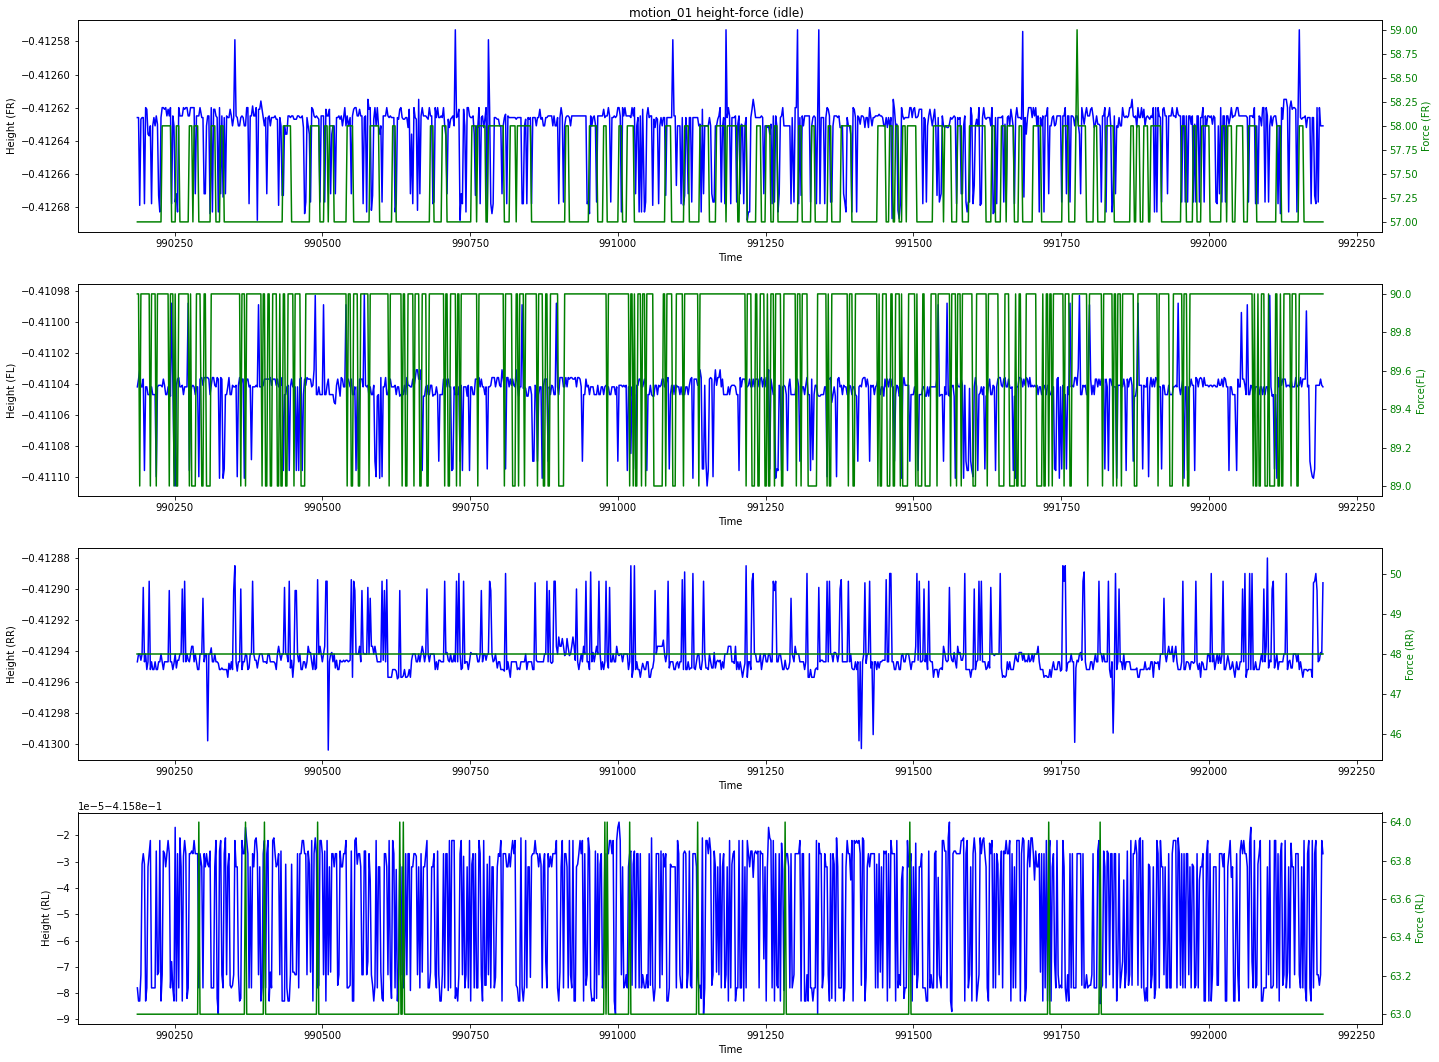

35901 35615 36849 36886


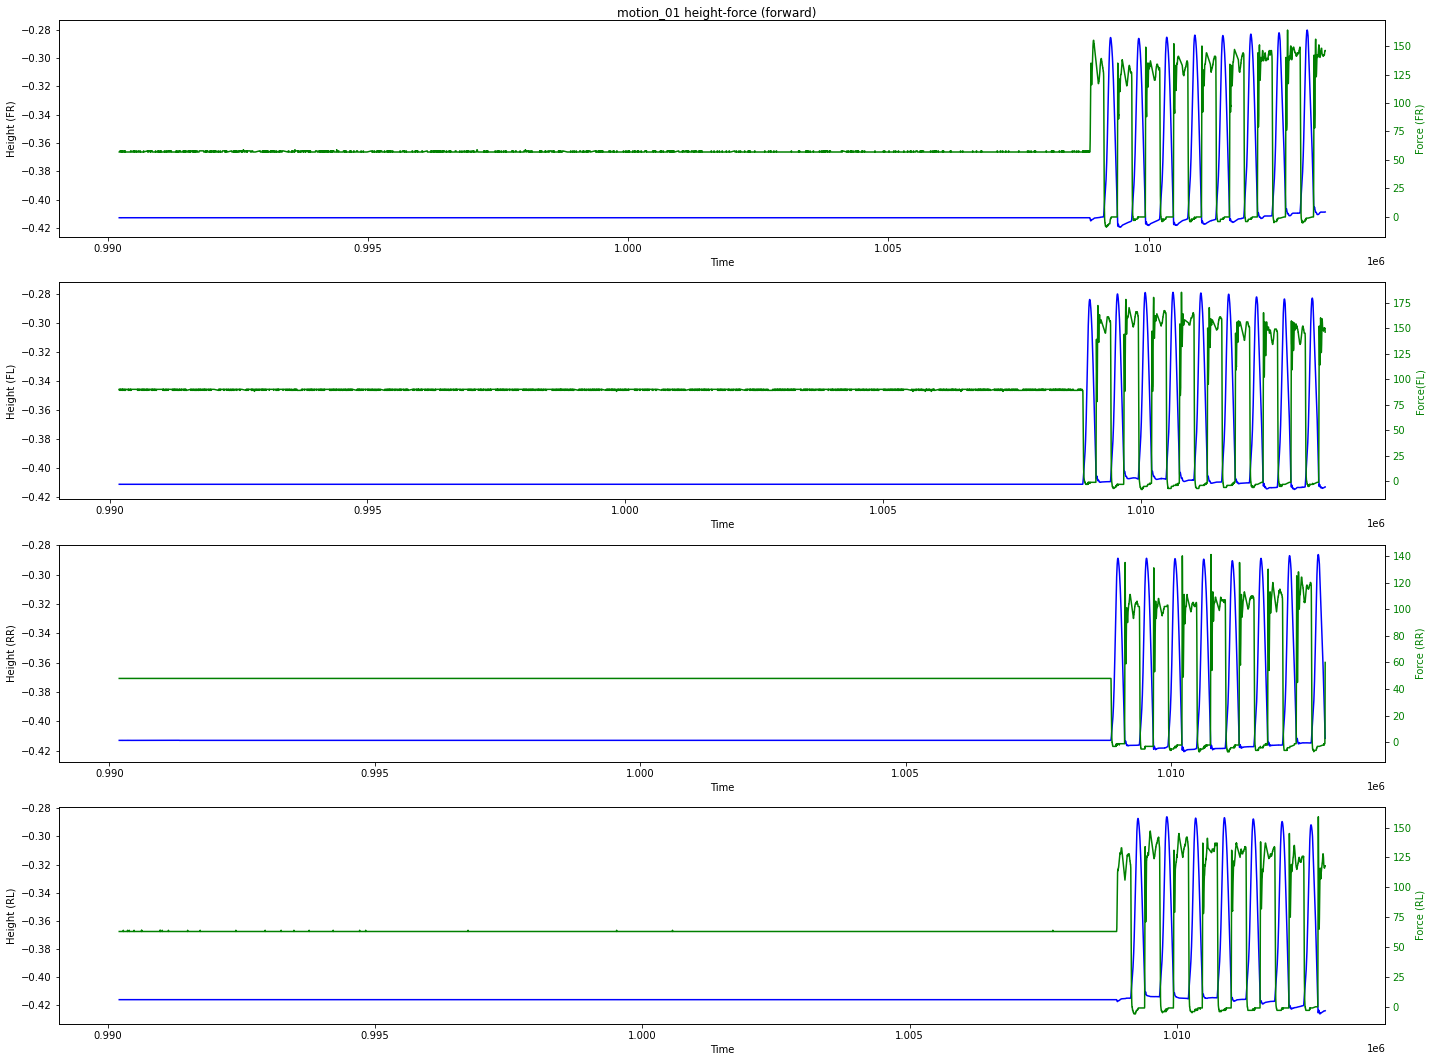

30183 29936 30472 30692


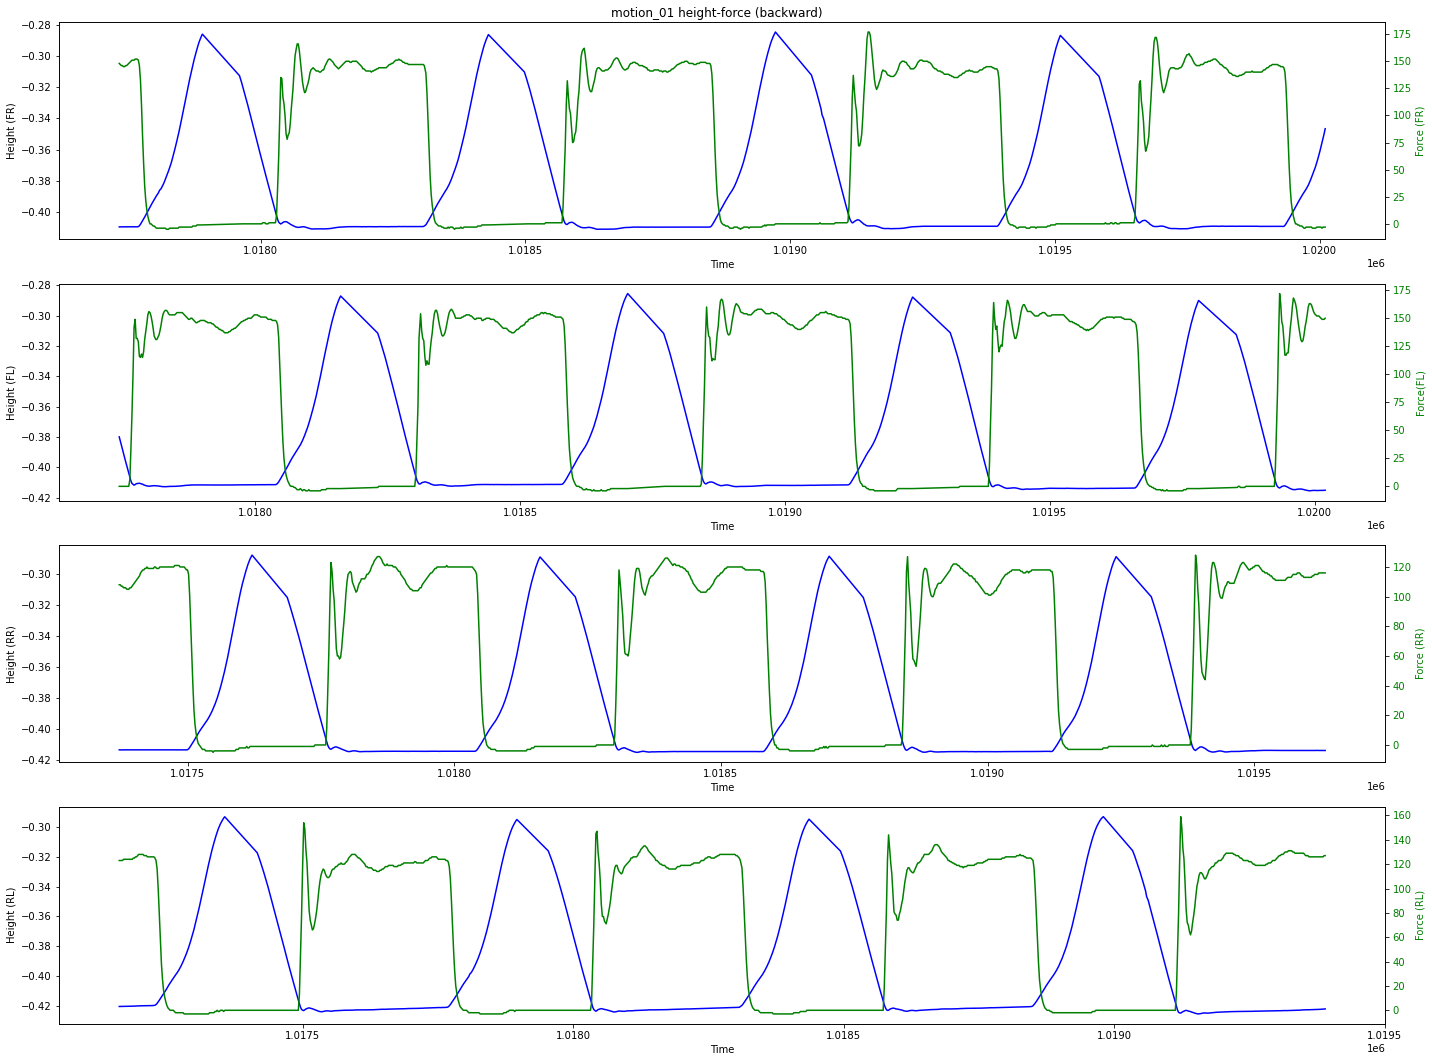

1235 1145 1200 1245


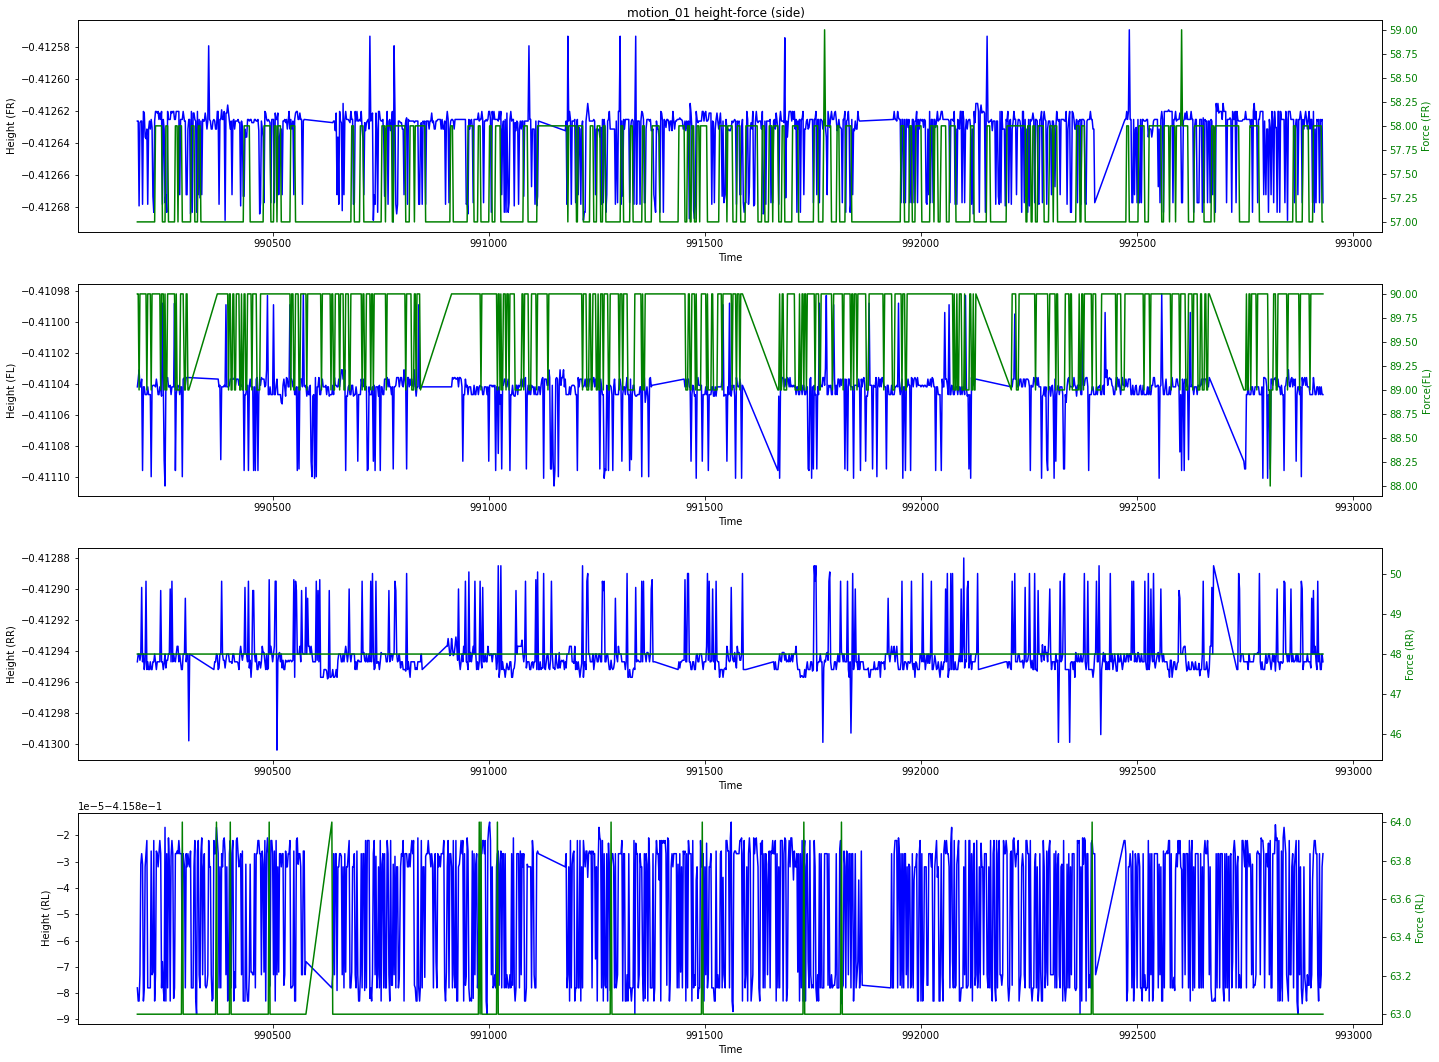

18859 18745 19023 19010


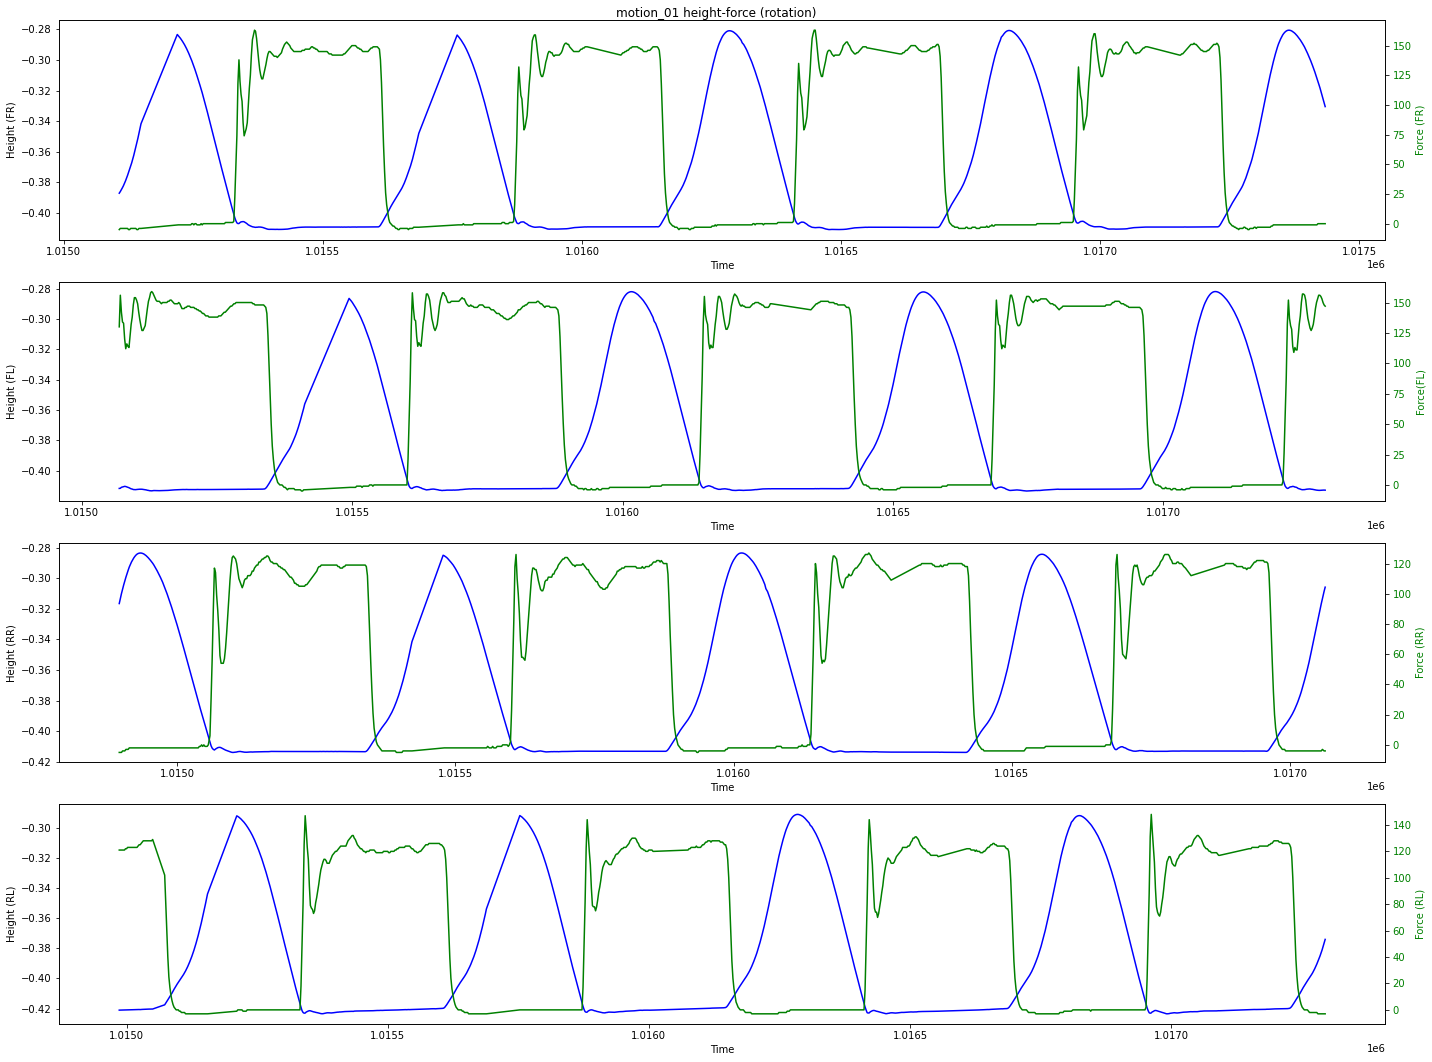

In [245]:
# Idle
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_01)

sample_walking_fr_height = fr_min_height[:1000]
sample_walking_fl_height = fl_min_height[:1000]
sample_walking_rr_height = rr_min_height[:1000]
sample_walking_rl_height = rl_min_height[:1000]

plot_overlapping_data("motion_01 height-force (idle)",
                      motion_01,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

# Forward
fwd_cmds = get_specific_cmd(motion_01, 0.1, 0, 0)
motion_01_fwd = motion_01[fwd_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_01_fwd)

sample_walking_fr_height = fr_min_height[:10000]
sample_walking_fl_height = fl_min_height[:10000]
sample_walking_rr_height = rr_min_height[:10000]
sample_walking_rl_height = rl_min_height[:10000]

plot_overlapping_data("motion_01 height-force (forward)",
                      motion_01,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

# Backwards
bwd_cmds = get_specific_cmd(motion_01, -0.1, 0, 0)
motion_01_bwd = motion_01[bwd_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_01_bwd)

sample_walking_fr_height = fr_min_height[12000:13000]
sample_walking_fl_height = fl_min_height[12000:13000]
sample_walking_rr_height = rr_min_height[12000:13000]
sample_walking_rl_height = rl_min_height[12000:13000]

plot_overlapping_data("motion_01 height-force (backward)",
                      motion_01,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

# Side
side_cmds = get_specific_cmd(motion_01, 0, 0.1, 0)
motion_01_side = motion_01[side_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_01_side)

sample_walking_fr_height = fr_min_height[:6700]
sample_walking_fl_height = fl_min_height[:6700]
sample_walking_rr_height = rr_min_height[:6700]
sample_walking_rl_height = rl_min_height[:6700]

plot_overlapping_data("motion_01 height-force (side)",
                      motion_01,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

# Rotation
rot_cmds = get_specific_cmd(motion_01, 0, 0, 0.1)
motion_01_rot = motion_01[rot_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_01_rot)

sample_walking_fr_height = fr_min_height[12000:13000]
sample_walking_fl_height = fl_min_height[12000:13000]
sample_walking_rr_height = rr_min_height[12000:13000]
sample_walking_rl_height = rl_min_height[12000:13000]

plot_overlapping_data("motion_01 height-force (rotation)",
                      motion_01,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

## Footsteps Extraction (Height + Force)

In [10]:
def extract_footsteps(dataset, height_threshold=0.1, force_thresholds=[100,100,100,100]):
    # Compute height difference for FR and FL
    fr_fl_diff = np.round(abs(dataset[:, 34] - dataset[:, 37]), 9)

    # Compute height difference for RR and RL
    rr_rl_diff = np.round(abs(dataset[:, 40] - dataset[:, 43]), 9)

    # Compute compound difference for all foots
    height_diff = np.round(fr_fl_diff + rr_rl_diff, 9)
    print("Min and max diff between right and left feet", min(height_diff), max(height_diff), "\n")
    
    # Find footsteps (based on height difference)
    footsteps_height = np.where(height_diff < height_threshold)[0]
    print("Amount of footsteps found with height criteria: ", len(footsteps_height), "\n")
    
    # Footsteps that belong to motion commands
    footsteps_due_to_motion = len(np.intersect1d(np.where(np.any(dataset[:, 2:5], axis=1))[0], footsteps_height))
    print("Intersection with motion commands: ", footsteps_due_to_motion, "\n")
    
    # Footsteps that belong to idle mode
    footsteps_due_to_stationarity = len(np.intersect1d(np.where(~np.any(dataset[:, 2:5], axis=1))[0], footsteps_height))
    print("Intersection with no motion commands: ", footsteps_due_to_stationarity, "\n")
    
    # FR min height (i.e swining motion)
    rear_force_footsteps = np.where(np.logical_and(dataset[:, 58] > force_thresholds[0], 
                                                   dataset[:, 59] > force_thresholds[1]))[0]
    front_force_footsteps = np.where(np.logical_and(dataset[:, 56] > force_thresholds[2], 
                                                    dataset[:, 57] > force_thresholds[3]))[0]

    # Find footsteps that match force constraints on all foot
    footsteps_force = np.intersect1d(rear_force_footsteps, front_force_footsteps)
    print("Number of force footsteps: ", len(footsteps_force), "\n")
    
    # Find force and height footsteps intersection
    force_height_footsteps = np.intersect1d(footsteps_force, footsteps_height)
    print("Number of height-force footsteps: ", len(force_height_footsteps), "\n")
    
    # Footsteps (from force and height) that belong to motion commands
    footsteps_due_to_motion = len(np.intersect1d(np.where(np.any(dataset[:, 2:5], axis=1))[0], force_height_footsteps))
    print("Number of footsteps extracted with height-force due to motion: ", footsteps_due_to_motion, "\n")
    
    # Footsteps (from force and height) that belong to motion commands
    footsteps_due_to_stationarity = len(np.intersect1d(np.where(~np.any(dataset[:, 2:5], axis=1))[0], force_height_footsteps))
    print("Number of footsteps extracted with height-force due to no motion: ", footsteps_due_to_stationarity, "\n")
    
    return force_height_footsteps

def footsteps_nms(dataset, footsteps):
    footsteps_nms = []

    footsteps_sort, timestamps_sort = zip(*sorted(zip(footsteps, dataset[footsteps, 0])))

    for idx, footstep_sort in enumerate(footsteps_sort):
        if idx > 0:
            if abs(dataset[footstep_sort, 0] - dataset[footsteps_sort[idx-1], 0]) < 9:
                continue
            else:
                footsteps_nms.append(footstep_sort)
        else:
            footsteps_nms.append(footstep_sort)

    return np.asarray(footsteps_nms)

### Footsteps

In [27]:
# Forward
fwd_cmds = get_specific_cmd(motion_01, 0.1, 0, 0)
motion_01_fwd = motion_01[fwd_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_01_fwd)

35901 35615 36849 36886


In [20]:
footsteps_01 = extract_footsteps(motion_01_fwd)
len(footsteps_01)

Min and max diff between FR and FL: 1e-06 0.138272 

Min and max diff between RR and RL: 2e-06 0.13306 

Min and max diff between right and left feet 6.8e-05 0.266234 

Amount of footsteps found with height criteria:  16885 

Intersection with motion commands:  16885 

Intersection with no motion commands:  0 

Number of force footsteps:  737 

Number of height-force footsteps:  737 

Number of footsteps extracted with height-force due to motion:  737 

Number of footsteps extracted with height-force due to no motion:  0 



737

In [246]:
footsteps_nms_01 = footsteps_nms(motion_01_fwd, footsteps_01)
len(footsteps_nms_01)

310

Timestamp:  1034265.0
Timestamp:  1034532.0
Timestamp:  1034801.0
Timestamp:  1035068.0
Timestamp:  1035338.0
Timestamp:  1035603.0
Timestamp:  1035876.0
Timestamp:  1036141.0
Timestamp:  1036412.0
Timestamp:  1036677.0
Timestamp:  1036950.0
Timestamp:  1037215.0
Timestamp:  1037488.0
Timestamp:  1037753.0
Timestamp:  1038024.0
Timestamp:  1034265.0
Timestamp:  1034532.0
Timestamp:  1034801.0
Timestamp:  1035068.0
Timestamp:  1035338.0
Timestamp:  1035603.0
Timestamp:  1035876.0
Timestamp:  1036141.0
Timestamp:  1036412.0
Timestamp:  1036677.0
Timestamp:  1036950.0
Timestamp:  1037215.0
Timestamp:  1037488.0
Timestamp:  1037753.0
Timestamp:  1038024.0
Timestamp:  1034265.0
Timestamp:  1034532.0
Timestamp:  1034801.0
Timestamp:  1035068.0
Timestamp:  1035338.0
Timestamp:  1035603.0
Timestamp:  1035876.0
Timestamp:  1036141.0
Timestamp:  1036412.0
Timestamp:  1036677.0
Timestamp:  1036950.0
Timestamp:  1037215.0
Timestamp:  1037488.0
Timestamp:  1037753.0
Timestamp:  1038024.0
Timestamp:

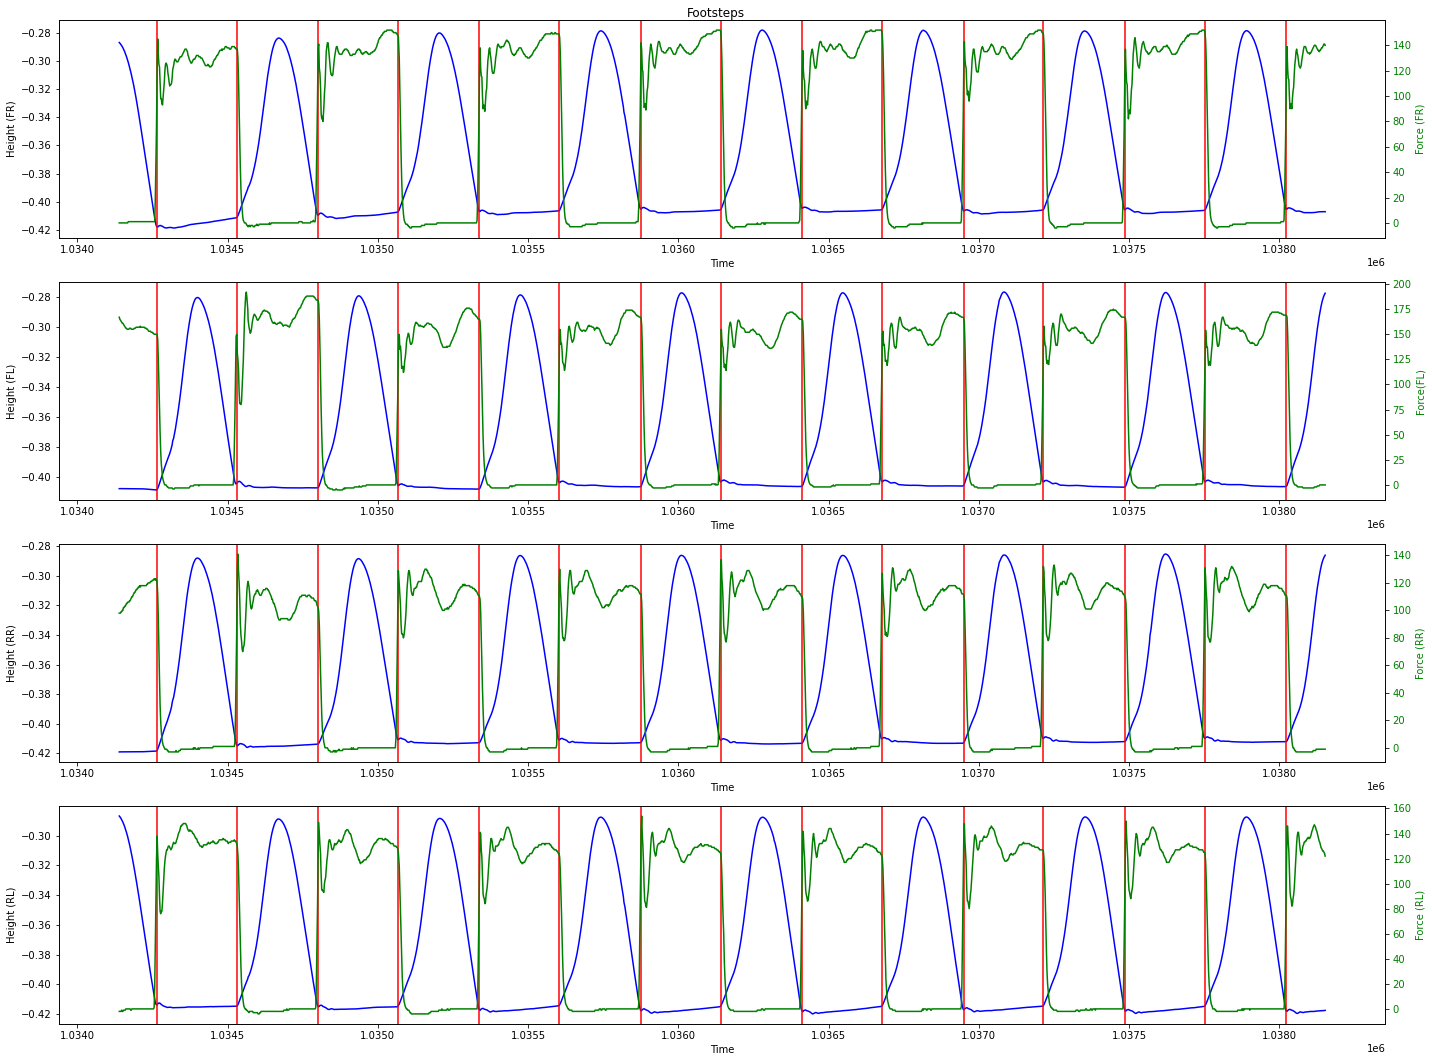

In [247]:
sample_walking_fr_height = fr_min_height[:2000]
sample_walking_fl_height = fl_min_height[:2000]
sample_walking_rr_height = rr_min_height[:2000]
sample_walking_rl_height = rl_min_height[:2000]

plot_overlapping_data("Footsteps",
                      motion_01_fwd,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59],
                       True,
                       motion_01_fwd[footsteps_nms(motion_01_fwd, footsteps_01), 0])

### Step size

In [248]:
def get_step_size(dataset, footsteps, idx_coord=[32,35,38,41]):
    # Compute adjacent diff w.r.t to x coord.
    adj_diff_fr = np.diff(dataset[footsteps, idx_coord[0]])
    adj_diff_fl = np.diff(dataset[footsteps, idx_coord[1]])
    adj_diff_rr = np.diff(dataset[footsteps, idx_coord[2]])
    adj_diff_rl = np.diff(dataset[footsteps, idx_coord[3]])

    # Compute step size
    step_size_fr = adj_diff_fr[np.where(adj_diff_fr > 0)[0]]
    step_size_fl = adj_diff_fl[np.where(adj_diff_fl > 0)[0]]
    step_size_rr = adj_diff_rr[np.where(adj_diff_rr > 0)[0]]
    step_size_rl = adj_diff_rl[np.where(adj_diff_rl > 0)[0]]

    # Print average step-size
    print("Avg. step size for FR foot: ", np.mean(step_size_fr))
    print("Avg. step size for FL foot: ", np.mean(step_size_fl))
    print("Avg. step size for RR foot: ", np.mean(step_size_rr))
    print("Avg. step size for RL foot: ", np.mean(step_size_rl), '\n')

    # Print std. dev. step-size
    print("Std. dev. step size for FR foot: ", np.std(step_size_fr))
    print("Std. dev. step size for FL foot: ", np.std(step_size_fl))
    print("Std. dev. step size for RR foot: ", np.std(step_size_rr))
    print("Std. dev. step size for RL foot: ", np.std(step_size_rl), '\n')
    
    return step_size_fr, step_size_fl, step_size_rr, step_size_rl

def get_step_veocities(dataset, footsteps, idx_coord=[32,35,38,41], idx_vel=[44,47,50,53]):
    # Compute adjacent diff w.r.t to x coord.
    adj_diff_fr = np.diff(dataset[footsteps, idx_coord[0]])
    adj_diff_fl = np.diff(dataset[footsteps, idx_coord[1]])
    adj_diff_rr = np.diff(dataset[footsteps, idx_coord[2]])
    adj_diff_rl = np.diff(dataset[footsteps, idx_coord[3]])

    # Compute step size
    step_size_vel_fr = dataset[footsteps[np.where(adj_diff_fr > 0)[0] + 1], idx_vel[0]]
    step_size_vel_fl = dataset[footsteps[np.where(adj_diff_fl > 0)[0] + 1], idx_vel[1]]
    step_size_vel_rr = dataset[footsteps[np.where(adj_diff_rr > 0)[0] + 1], idx_vel[2]]
    step_size_vel_rl = dataset[footsteps[np.where(adj_diff_rl > 0)[0] + 1], idx_vel[3]]

    # Print average step-size
    print("Avg. step size velocity for FR foot: ", np.mean(step_size_vel_fr))
    print("Avg. step size velocity for FL foot: ", np.mean(step_size_vel_fl))
    print("Avg. step size velocity for RR foot: ", np.mean(step_size_vel_rr))
    print("Avg. step size  velocityfor RL foot: ", np.mean(step_size_vel_rl), '\n')

    # Print std. dev. step-size
    print("Std. dev. step size velocity for FR foot: ", np.std(step_size_vel_fr))
    print("Std. dev. step size velocity for FL foot: ", np.std(step_size_vel_fl))
    print("Std. dev. step size velocity for RR foot: ", np.std(step_size_vel_rr))
    print("Std. dev. step size velocity for RL foot: ", np.std(step_size_vel_rl), '\n')
    
    return step_size_vel_fr, step_size_vel_fl, step_size_vel_rr, step_size_vel_rl

def get_step_timistamps(dataset, footsteps, idx_coord=[32,35,38,41]):
    # Compute adjacent diff w.r.t to x coord.
    adj_diff_fr = np.diff(dataset[footsteps, idx_coord[0]])
    adj_diff_fl = np.diff(dataset[footsteps, idx_coord[1]])
    adj_diff_rr = np.diff(dataset[footsteps, idx_coord[2]])
    adj_diff_rl = np.diff(dataset[footsteps, idx_coord[3]])

    # Compute step size
    step_size_timestamp_fr = dataset[footsteps[np.where(adj_diff_fr > 0)[0] + 1], 0]
    step_size_timestamp_fl = dataset[footsteps[np.where(adj_diff_fl > 0)[0] + 1], 0]
    step_size_timestamp_rr = dataset[footsteps[np.where(adj_diff_rr > 0)[0] + 1], 0]
    step_size_timestamp_rl = dataset[footsteps[np.where(adj_diff_rl > 0)[0] + 1], 0]
    
    return step_size_timestamp_fr, step_size_timestamp_fl, step_size_timestamp_rr, step_size_timestamp_rl

"""
    Plot step size vs velocity
"""
def plot_step_size_vs_velocity(title: str, step_sizes, step_velocity, step_timestamps):
    fig, ax1 = plt.subplots(1,1, figsize=(15,10))
    fig.suptitle(title)
    
    # FR plot (height)
    ax1.plot(step_timestamps, step_sizes, 'b-')
    ax1.set_ylabel('Step-size')
    ax1.set_xlabel('Time')
         
    # FR plot (force)
    ax2 = ax1.twinx()
    ax2.plot(step_timestamps, step_velocity, 'g-')
    ax2.set_ylabel('Velocity', color='g')

    for tl in ax2.get_yticklabels():
        tl.set_color('g')
    
    fig.tight_layout()
    plt.show()

#### Forward motions only

In [125]:
# Step size and velocity along x axis 
step_size_fr_x,_,_,_ = get_step_size(motion_01_fwd, footsteps_nms_01)
step_size_vel_fr_x,_,_,_ = get_step_veocities(motion_01_fwd, footsteps_nms_01)
step_size_timestamp_x,_,_,_ = get_step_timistamps(motion_01_fwd, footsteps_nms_01)

Avg. step size for FR foot:  0.042455660130718956
Avg. step size for FL foot:  0.03944396794871795
Avg. step size for RR foot:  0.041734
Avg. step size for RL foot:  0.038058529411764706 

Std. dev. step size for FR foot:  0.008039573109308334
Std. dev. step size for FL foot:  0.008373231165231773
Std. dev. step size for RR foot:  0.007775613729952083
Std. dev. step size for RL foot:  0.00665560115094854 

Avg. step size velocity for FR foot:  -0.10832747176470586
Avg. step size velocity for FL foot:  -0.11858149525448718
Avg. step size velocity for RR foot:  0.25363675225806454
Avg. step size  velocityfor RL foot:  0.2179613497385621 

Std. dev. step size velocity for FR foot:  0.11304492189548816
Std. dev. step size velocity for FL foot:  0.16418618163543058
Std. dev. step size velocity for RR foot:  0.10954857359721028
Std. dev. step size velocity for RL foot:  0.15776519533445776 



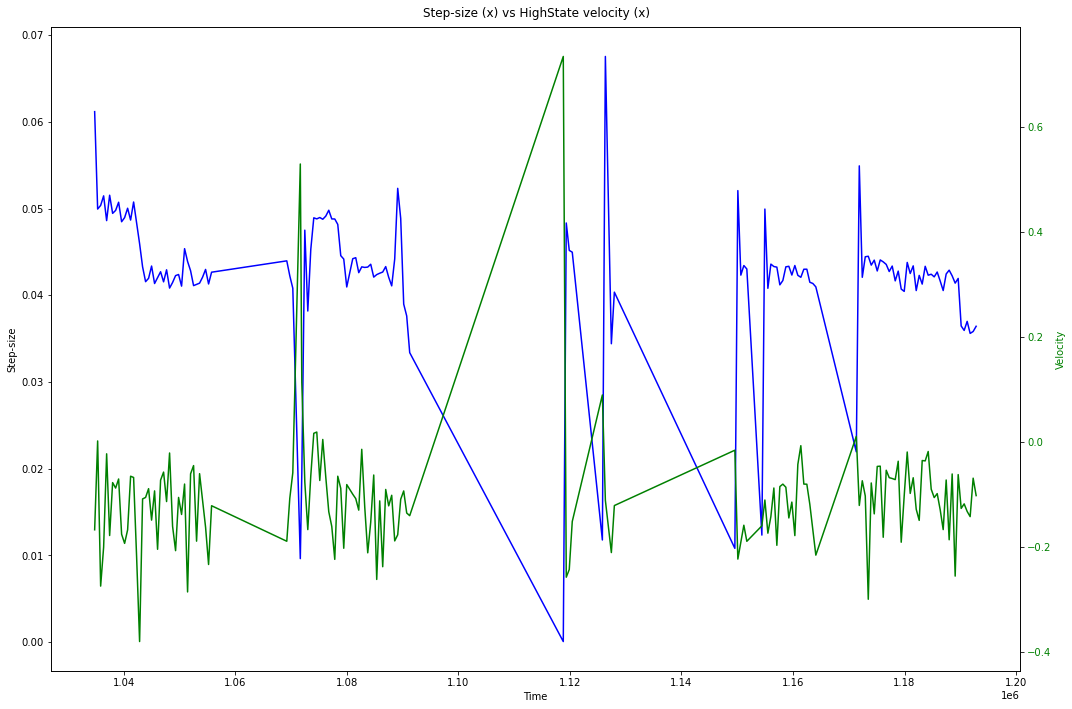

In [128]:
assert step_size_fr_x.shape == step_size_vel_fr_x.shape
plot_step_size_vs_velocity("Step-size (x) vs HighState velocity (x)", step_size_fr_x, step_size_vel_fr_x, step_size_timestamp_x)

In [250]:
# Step size along y axis 
_,_,_,_ = get_step_size(motion_01_fwd, footsteps_nms_01, idx_coord=[33, 36, 39, 42])

Avg. step size for FR foot:  0.004190335403726708
Avg. step size for FL foot:  0.0035164294478527607
Avg. step size for RR foot:  0.005687923611111111
Avg. step size for RL foot:  0.006055373417721519 

Std. dev. step size for FR foot:  0.003937157321685674
Std. dev. step size for FL foot:  0.002716793136108985
Std. dev. step size for RR foot:  0.006189930217565575
Std. dev. step size for RL foot:  0.0068195785519621355 



In [252]:
# Step size along z axis 
_,_,_,_ = get_step_size(motion_01_fwd, footsteps_nms_01, idx_coord=[34, 37, 40, 43])

Avg. step size for FR foot:  0.001205375
Avg. step size for FL foot:  0.0016040789473684184
Avg. step size for RR foot:  0.0010954876543209906
Avg. step size for RL foot:  0.0012810258064516124 

Std. dev. step size for FR foot:  0.0009846840383735441
Std. dev. step size for FL foot:  0.0013151519200133033
Std. dev. step size for RR foot:  0.0009006330163249032
Std. dev. step size for RL foot:  0.0011674943555759767 



### Footstep visualization

In [136]:
def visualize_static_foosteps(dataset, footsteps):
    # Visualize footsteps
    for footstep in footsteps:
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')

        #ax.set_xlim([-0.5, 0.5])
        #ax.set_ylim([-0.3, 0.3])
        ax.set_zlim([-0.5, 0.5])

        D[footstep, 32:44] = np.round(dataset[footstep, 32:44], 3)

        # 3D positions
        xs = np.array([dataset[footstep, 32], dataset[footstep, 35], dataset[footstep, 38], dataset[footstep, 41]])
        ys = np.array([dataset[footstep, 33], dataset[footstep, 36], dataset[footstep, 39], dataset[footstep, 42]])
        zs = np.array([dataset[footstep, 34], dataset[footstep, 37], dataset[footstep, 40], dataset[footstep, 43]])

        print(xs, ys, zs, dataset[footstep, 2:5], dataset[footstep, 25:28])

        ax.scatter(xs, ys, zs, marker='o')

        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        ax.set_zlabel('Z Label')

        plt.show()

In [186]:
def update_points(num, dataset, footsteps, x, y, z, points):    
    # Starting footstep index
    footstep = footsteps[num]
    
    # Round footsteps position
    dataset[footstep, 32:44] = np.round(dataset[footstep, 32:44], 3)

    # Initial footsteps 3D positions
    new_x = np.array([dataset[footstep, 32], dataset[footstep, 35], dataset[footstep, 38], dataset[footstep, 41]])
    new_y = np.array([dataset[footstep, 33], dataset[footstep, 36], dataset[footstep, 39], dataset[footstep, 42]])
    new_z = np.array([dataset[footstep, 34], dataset[footstep, 37], dataset[footstep, 40], dataset[footstep, 43]])

    # update properties
    points.set_data(new_x, new_y)
    points.set_3d_properties(new_z, 'z')

    # return modified artists
    return points

def visualize_animated_footsteps(dataset, footsteps, style: str):
    # Create figure
    fig = plt.figure()
    ax = p3.Axes3D(fig)

    # Setting the axes properties
    ax.set_xlim3d([-0.4, 0.4])
    ax.set_xlabel('X')

    ax.set_ylim3d([-0.2, 0.2])
    ax.set_ylabel('Y')

    ax.set_zlim3d([-0.5, 0.5])
    ax.set_zlabel('Z')

    # Starting footstep index
    footstep = footsteps[0]

    # Round footsteps position
    dataset[footstep, 32:44] = np.round(dataset[footstep, 32:44], 3)

    # Initial footsteps 3D positions
    x = np.array([dataset[footstep, 32], dataset[footstep, 35], dataset[footstep, 38], dataset[footstep, 41]])
    y = np.array([dataset[footstep, 33], dataset[footstep, 36], dataset[footstep, 39], dataset[footstep, 42]])
    z = np.array([dataset[footstep, 34], dataset[footstep, 37], dataset[footstep, 40], dataset[footstep, 43]])

    txt = fig.suptitle('')
    points, = ax.plot(x, y, z, style)
    
    # blit=True re-draws only the parts that have changed.
    anim = animation.FuncAnimation(fig, update_points, frames=len(footsteps), fargs=(dataset, footsteps, x, y, z, points))
    
    return anim   

In [187]:
def update_prediction_points(dataset, num, x, y, z, points):  
    # Starting footstep index
    footstep = footsteps[num]
    
    # Round footsteps position
    D[footstep, 32:44] = np.round(dataset[footstep, 32:44], 3)

    # Initial footsteps 3D positions
    new_x = np.array([dataset[footstep, 32], dataset[footstep, 35], dataset[footstep, 38], dataset[footstep, 41]])
    new_y = np.array([dataset[footstep, 33], dataset[footstep, 36], dataset[footstep, 39], dataset[footstep, 42]])
    new_z = np.array([dataset[footstep, 34], dataset[footstep, 37], dataset[footstep, 40], dataset[footstep, 43]])

    # update properties
    points.set_data(new_x, new_y)
    points.set_3d_properties(new_z, 'z')

    # return modified artists
    return points

def visualize_predicted_animated_footsteps(dataset, footsteps, style: str):
    # Create figure
    fig = plt.figure()
    ax = p3.Axes3D(fig)

    # Setting the axes properties
    ax.set_xlim3d([-0.4, 0.4])
    ax.set_xlabel('X')

    ax.set_ylim3d([-0.2, 0.2])
    ax.set_ylabel('Y')

    ax.set_zlim3d([-0.5, 0.5])
    ax.set_zlabel('Z')

    # Starting footstep index
    footstep = footsteps[0]

    # Round footsteps position
    D[footstep, 32:44] = np.round(dataset[footstep, 32:44], 3)

    # Initial footsteps 3D positions
    x = np.array([dataset[footstep, 32], dataset[footstep, 35], dataset[footstep, 38], dataset[footstep, 41]])
    y = np.array([dataset[footstep, 33], dataset[footstep, 36], dataset[footstep, 39], dataset[footstep, 42]])
    z = np.array([dataset[footstep, 34], dataset[footstep, 37], dataset[footstep, 40], dataset[footstep, 43]])

    txt = fig.suptitle('')
    points, = ax.plot(x, y, z, style)
    
    # blit=True re-draws only the parts that have changed.
    anim = animation.FuncAnimation(fig, update_points, frames=len(footsteps), fargs=(dataset, x, y, z, points))
    
    return anim   

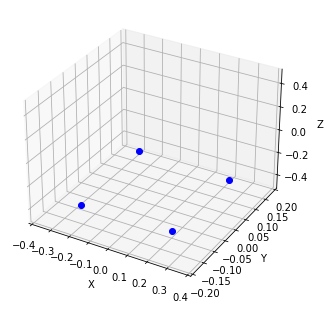

In [210]:
anim = visualize_animated_footsteps(motion_01_fwd, footsteps_nms_01, "bo")
HTML(anim.to_html5_video())

# Cmd vs State Velocities

In [213]:
def plot_step_size_vs_velocity(title: str, cmd_velocity, state_velocity, timestamp):
    fig, ax1 = plt.subplots(1,1, figsize=(15,10))
    fig.suptitle(title)
    
    # FR plot (height)
    ax1.plot(timestamp, cmd_velocity, 'b-')
    ax1.set_ylabel('Step-size')
    ax1.set_xlabel('Time')
         
    # FR plot (force)
    ax2 = ax1.twinx()
    ax2.plot(timestamp, state_velocity, 'g-')
    ax2.set_ylabel('Velocity', color='g')

    for tl in ax2.get_yticklabels():
        tl.set_color('g')
    
    fig.tight_layout()
    plt.show()

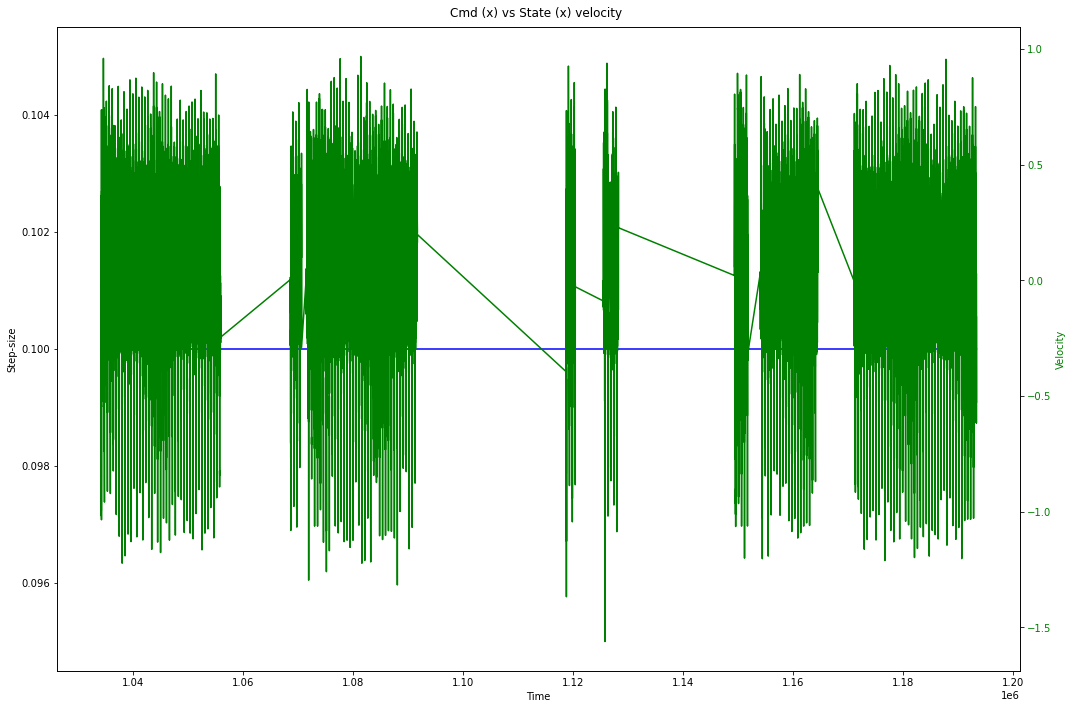

In [214]:
plot_step_size_vs_velocity("Cmd (x) vs State (x) velocity", motion_01_fwd[:, 2], motion_01_fwd[:, 44], motion_01_fwd[:, 0])

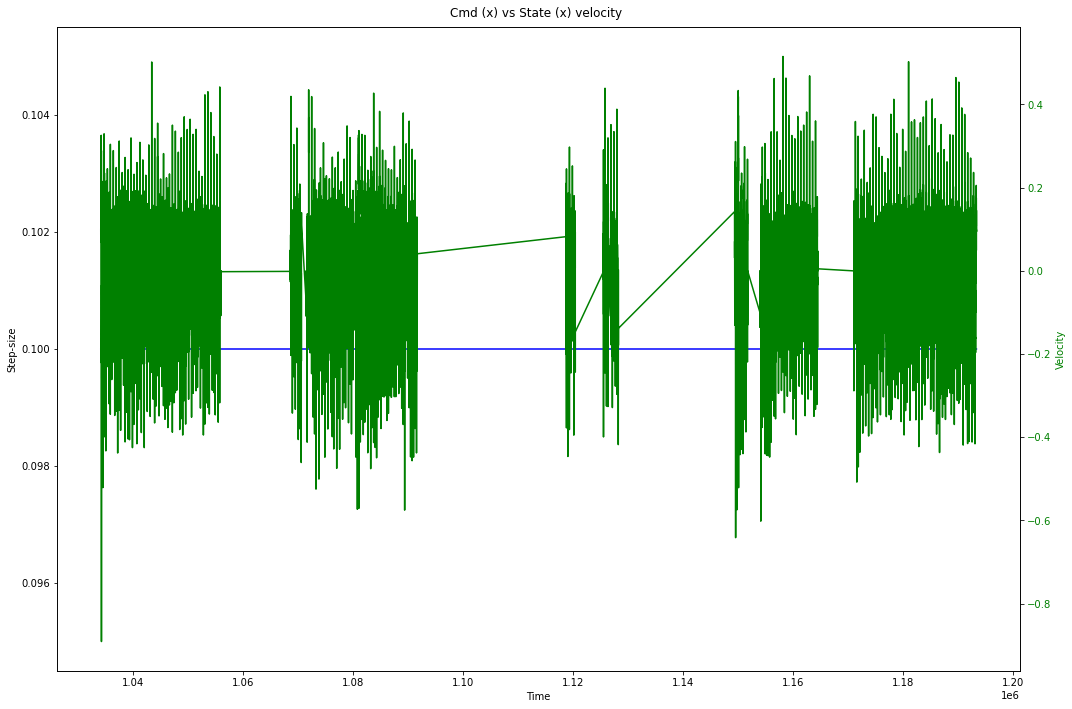

In [216]:
plot_step_size_vs_velocity("Cmd (x) vs State (x) velocity", motion_01_fwd[:, 2], motion_01_fwd[:, 45], motion_01_fwd[:, 0])

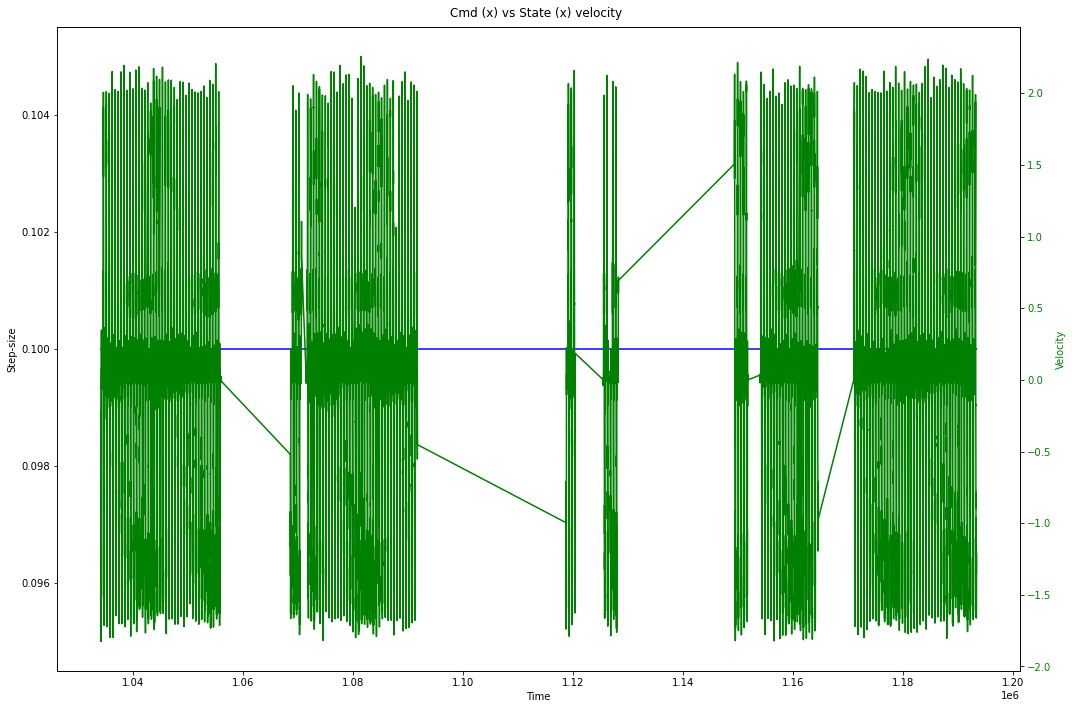

In [217]:
plot_step_size_vs_velocity("Cmd (x) vs State (x) velocity", motion_01_fwd[:, 2], motion_01_fwd[:, 46], motion_01_fwd[:, 0])

# Multivariate Linear Regression (FR foot prediction)

The input will use initially only:

- **HighCmd: fwd, side, rot speeds**
- **HighState: fwd, side, rot speeds, footPosition2Body (FR)**

and as output we seek to predict the following:

- **footPosition2Body (FR)**

In [188]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [235]:
def plot_target_and_predictions(title: str, predictions, target):
    fig, ax1 = plt.subplots(1,1, figsize=(15,10))
    fig.suptitle(title)
    
    # FR plot (height)
    ax1.plot(range(predictions.shape[0]), predictions, 'b-')
    ax1.set_ylabel('Predictions')
    ax1.set_xlabel('Time')
         
    # FR plot (force)
    ax2 = ax1.twinx()
    ax2.plot(range(predictions.shape[0]), target, 'g-')
    ax2.set_ylabel('Target', color='g')

    for tl in ax2.get_yticklabels():
        tl.set_color('g')
    
    fig.tight_layout()
    plt.show()

## Predict FR foot (x,y,z)

In [236]:
D = motion_01_fwd
footsteps = footsteps_nms_01

In [237]:
# Stack motion command, velocity state, 
# and foot x coordinate in order to 
# create the input matrix. We dont consider
# the last row.
X = np.hstack((D[footsteps, 2:5], D[footsteps, 25:28], D[footsteps, 32:35], D[footsteps, 35:38]))[:-1, :]
print("Input shape: ", X.shape)

# Label matrix which consists only of
# the next x coordinate of the FR foot.
# We dont consider the first row.
Y = D[footsteps, 32:35][1:]
print("Labels shape: ", Y.shape)

# Make sure we have the same
# number of rows for both labels
# and input
assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10, random_state=42)

# Create the model
model_fr_full = LinearRegression()

# Fit the model
model_fr_full.fit(X_train, Y_train)

# Predict
predictions = model_fr_full.predict(X_test)
print("Predictions shape: ", predictions.shape)

# Compute MSE
mse = np.sum((predictions - Y_test)**2) / predictions.shape[0]

# Compute MAE
print("The MSE between the prediction and groundtruth is: ", mse)

Input shape:  (309, 12)
Labels shape:  (309, 3)
Predictions shape:  (31, 3)
The MSE between the prediction and groundtruth is:  7.369862677153543e-05


In [238]:
for idx, prediction in enumerate(predictions):
    print(f'Start: {X_test[idx, 6:9]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

Start: [ 0.261 -0.129 -0.411]. Groundtruth: [ 0.219 -0.137 -0.409]. Predicted: [ 0.21894022 -0.1339918  -0.4096723 ]
Start: [ 0.213 -0.14  -0.406]. Groundtruth: [ 0.262 -0.138 -0.407]. Predicted: [ 0.26116507 -0.13761312 -0.40644996]
Start: [ 0.217 -0.136 -0.41 ]. Groundtruth: [ 0.26  -0.135 -0.411]. Predicted: [ 0.25697248 -0.1335973  -0.41052925]
Start: [ 0.257 -0.136 -0.411]. Groundtruth: [ 0.215 -0.137 -0.409]. Predicted: [ 0.21695089 -0.13686906 -0.41012888]
Start: [ 0.214 -0.141 -0.406]. Groundtruth: [ 0.262 -0.139 -0.406]. Predicted: [ 0.26144987 -0.13811384 -0.40618727]
Start: [ 0.216 -0.137 -0.409]. Groundtruth: [ 0.259 -0.137 -0.409]. Predicted: [ 0.25602093 -0.13464175 -0.41000244]
Start: [ 0.259 -0.136 -0.41 ]. Groundtruth: [ 0.222 -0.135 -0.409]. Predicted: [ 0.21770586 -0.13193378 -0.41004549]
Start: [ 0.26  -0.126 -0.412]. Groundtruth: [ 0.218 -0.134 -0.41 ]. Predicted: [ 0.2161668  -0.13522333 -0.40988237]
Start: [ 0.262 -0.133 -0.409]. Groundtruth: [ 0.218 -0.136 -0.40

In [239]:
predictions[:, 0]

array([0.21894022, 0.26116507, 0.25697248, 0.21695089, 0.26144987,
       0.25602093, 0.21770586, 0.2161668 , 0.22052053, 0.21679651,
       0.25653077, 0.2386398 , 0.2607014 , 0.21948777, 0.21732676,
       0.26048096, 0.26277919, 0.22656677, 0.25612499, 0.26351847,
       0.25764942, 0.21486895, 0.21483144, 0.21837111, 0.21682392,
       0.21482968, 0.26165642, 0.2598686 , 0.2159613 , 0.26063142,
       0.21146457])

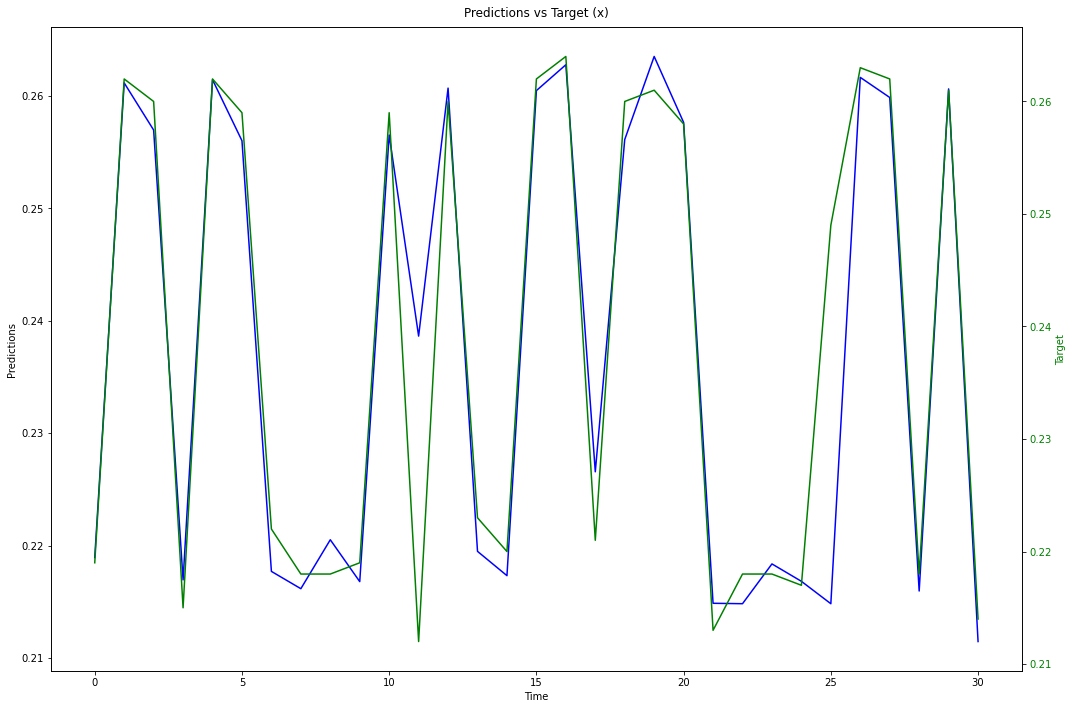

In [241]:
plot_target_and_predictions("Predictions vs Target (x)", predictions[:, 0], Y_test[:, 0])

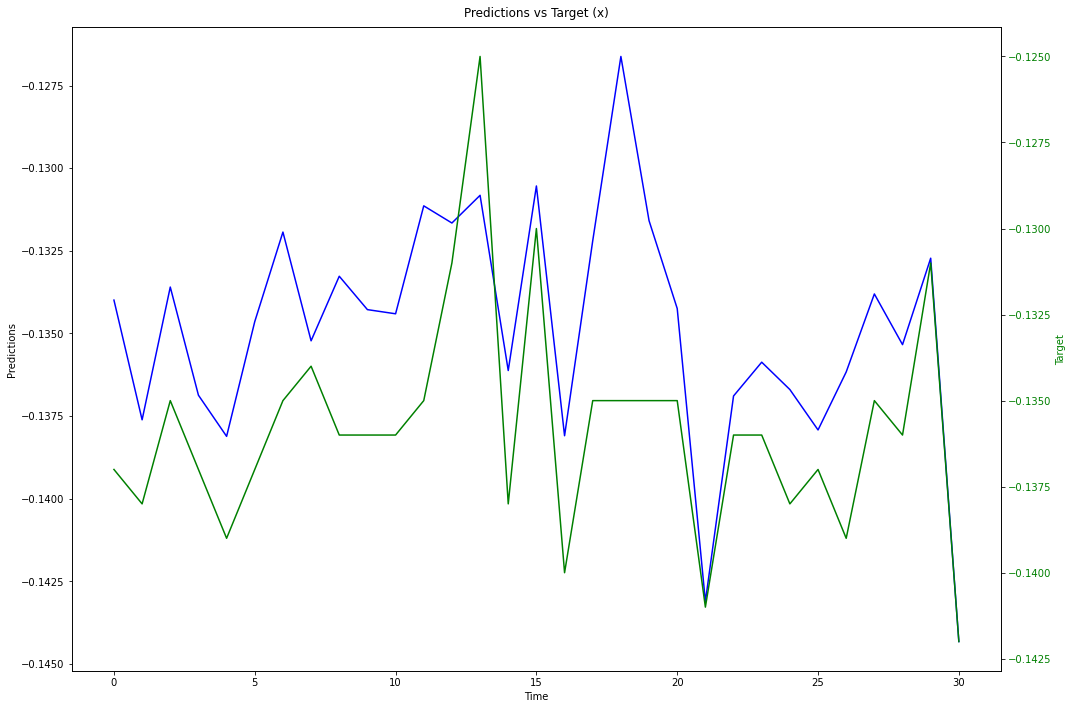

In [244]:
plot_target_and_predictions("Predictions vs Target (x)", predictions[:, 1], Y_test[:, 1])

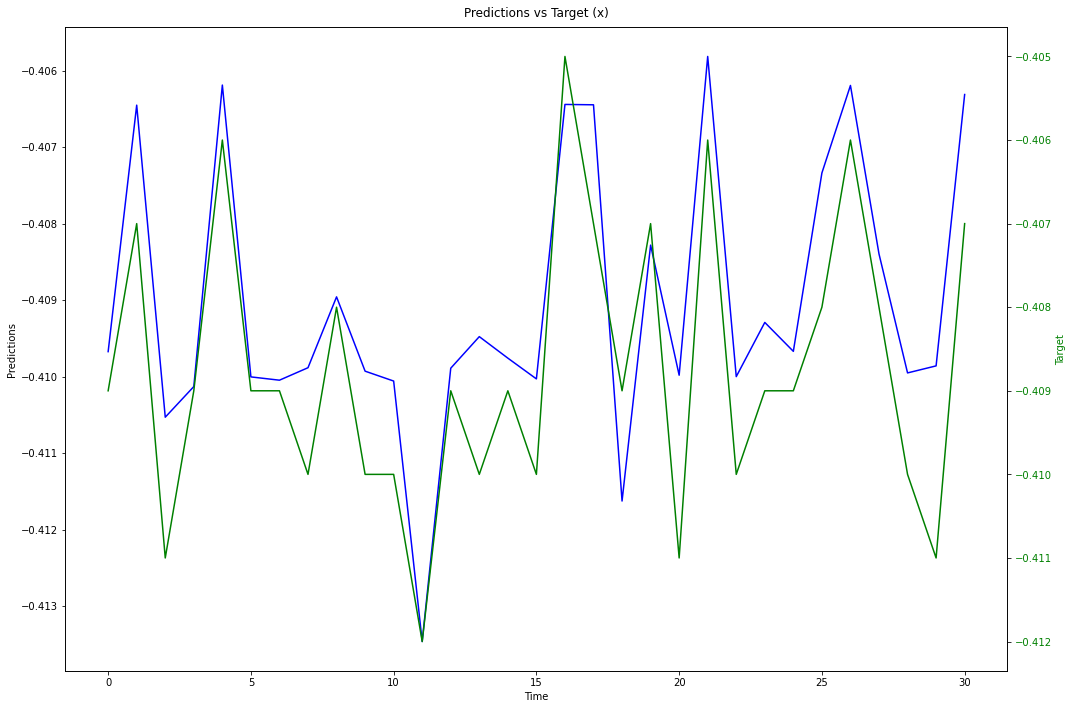

In [243]:
plot_target_and_predictions("Predictions vs Target (x)", predictions[:, 2], Y_test[:, 2])

### Predict FR foot -> x

In [202]:
# Stack motion command, velocity state, 
# and foot x coordinate in order to 
# create the input matrix. We dont consider
# the last row.
X = np.hstack((D[footsteps, 2:5], D[footsteps, 25:28], np.array([D[footsteps, 32]]).T, np.array([D[footsteps, 35]]).T))[:-1, :]
print("Input shape: ", X.shape)

# Label matrix which consists only of
# the next x coordinate of the FR foot.
# We dont consider the first row.
Y = np.array([D[footsteps, 32]]).T[1:]
print("Labels shape: ", Y.shape)

# Make sure we have the same
# number of rows for both labels
# and input
assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10, random_state=42)

# Create the model
model_fr_x = LinearRegression()

# Fit the model
model_fr_x.fit(X_train, Y_train)

# Predict
predictions = model_fr_x.predict(X_test)
print("Predictions shape: ", predictions.shape)

# Compute MSE
mse = np.sum((predictions - Y_test)**2) / predictions.shape[0]

# Compute MAE
print("The mean avg. error between the prediction and groundtruth is: ", mse)

Input shape:  (309, 8)
Labels shape:  (309, 1)
Predictions shape:  (31, 1)
The mean avg. error between the prediction and groundtruth is:  8.131987132486005e-05


In [204]:
for idx, prediction in enumerate(predictions):
    print(f'Start: {X_test[idx, 6]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

Start: 0.261. Groundtruth: [0.219]. Predicted: [0.21854131]
Start: 0.213. Groundtruth: [0.262]. Predicted: [0.25899646]
Start: 0.217. Groundtruth: [0.26]. Predicted: [0.25902779]
Start: 0.257. Groundtruth: [0.215]. Predicted: [0.21903109]
Start: 0.214. Groundtruth: [0.262]. Predicted: [0.25901906]
Start: 0.216. Groundtruth: [0.259]. Predicted: [0.25853513]
Start: 0.259. Groundtruth: [0.222]. Predicted: [0.21814825]
Start: 0.26. Groundtruth: [0.218]. Predicted: [0.21763203]
Start: 0.262. Groundtruth: [0.218]. Predicted: [0.21724319]
Start: 0.261. Groundtruth: [0.219]. Predicted: [0.21701137]
Start: 0.216. Groundtruth: [0.259]. Predicted: [0.25808018]
Start: 0.225. Groundtruth: [0.212]. Predicted: [0.24306683]
Start: 0.218. Groundtruth: [0.26]. Predicted: [0.26211727]
Start: 0.259. Groundtruth: [0.223]. Predicted: [0.21792251]
Start: 0.26. Groundtruth: [0.22]. Predicted: [0.21839551]
Start: 0.219. Groundtruth: [0.262]. Predicted: [0.25870523]
Start: 0.213. Groundtruth: [0.264]. Predicted

### Predict FR foot -> y

In [205]:
# Stack motion command, velocity state, 
# and foot x coordinate in order to 
# create the input matrix. We dont consider
# the last row.
X = np.hstack((D[footsteps, 2:5], D[footsteps, 25:28], np.array([D[footsteps, 33]]).T, np.array([D[footsteps, 36]]).T))[:-1, :]
print("Input shape: ", X.shape)

# Label matrix which consists only of
# the next x coordinate of the FR foot.
# We dont consider the first row.
Y = np.array([D[footsteps, 33]]).T[1:]
print("Labels shape: ", Y.shape)

# Make sure we have the same
# number of rows for both labels
# and input
assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10, random_state=42)

# Create the model
model_fr_y = LinearRegression()

# Fit the model
model_fr_y.fit(X_train, Y_train)

# Predict
predictions = model_fr_y.predict(X_test)
print("Predictions shape: ", predictions.shape)

# Compute MSE
mse = np.sum((predictions - Y_test)**2) / predictions.shape[0]

# Compute MAE
print("The mean avg. error between the prediction and groundtruth is: ", mse)

Input shape:  (309, 8)
Labels shape:  (309, 1)
Predictions shape:  (31, 1)
The mean avg. error between the prediction and groundtruth is:  1.2411620438615764e-05


In [207]:
for idx, prediction in enumerate(predictions):
    print(f'Start: {X_test[idx, 6]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

Start: -0.129. Groundtruth: [-0.137]. Predicted: [-0.136038]
Start: -0.14. Groundtruth: [-0.138]. Predicted: [-0.14019814]
Start: -0.136. Groundtruth: [-0.135]. Predicted: [-0.1325658]
Start: -0.136. Groundtruth: [-0.137]. Predicted: [-0.13468969]
Start: -0.141. Groundtruth: [-0.139]. Predicted: [-0.14057154]
Start: -0.137. Groundtruth: [-0.137]. Predicted: [-0.1321939]
Start: -0.136. Groundtruth: [-0.135]. Predicted: [-0.13067817]
Start: -0.126. Groundtruth: [-0.134]. Predicted: [-0.13622038]
Start: -0.133. Groundtruth: [-0.136]. Predicted: [-0.13461264]
Start: -0.131. Groundtruth: [-0.136]. Predicted: [-0.13394752]
Start: -0.137. Groundtruth: [-0.136]. Predicted: [-0.1324242]
Start: -0.125. Groundtruth: [-0.135]. Predicted: [-0.12709268]
Start: -0.137. Groundtruth: [-0.131]. Predicted: [-0.13331748]
Start: -0.124. Groundtruth: [-0.125]. Predicted: [-0.12995861]
Start: -0.132. Groundtruth: [-0.138]. Predicted: [-0.13630244]
Start: -0.137. Groundtruth: [-0.13]. Predicted: [-0.13238862]

### Predict FR foot -> z

In [208]:
# Stack motion command, velocity state, 
# and foot x coordinate in order to 
# create the input matrix. We dont consider
# the last row.
X = np.hstack((D[footsteps, 2:5], D[footsteps, 25:28], np.array([D[footsteps, 34]]).T, np.array([D[footsteps, 37]]).T))[:-1, :]
print("Input shape: ", X.shape)

# Label matrix which consists only of
# the next x coordinate of the FR foot.
# We dont consider the first row.
Y = np.array([D[footsteps, 34]]).T[1:]
print("Labels shape: ", Y.shape)

# Make sure we have the same
# number of rows for both labels
# and input
assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10, random_state=42)

# Create the model
model_fr_z = LinearRegression()

# Fit the model
model_fr_z.fit(X_train, Y_train)

# Predict
predictions = model_fr_z.predict(X_test)
print("Predictions shape: ", predictions.shape)

# Compute MSE
mse = np.sum((predictions - Y_test)**2) / predictions.shape[0]

# Compute ME
print("The mean avg. error between the prediction and groundtruth is: ", mse)

Input shape:  (309, 8)
Labels shape:  (309, 1)
Predictions shape:  (31, 1)
The mean avg. error between the prediction and groundtruth is:  1.1592743026887801e-06


In [209]:
for idx, prediction in enumerate(predictions):
    print(f'Start: {X_test[idx, 6]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

Start: -0.411. Groundtruth: [-0.409]. Predicted: [-0.40953358]
Start: -0.406. Groundtruth: [-0.407]. Predicted: [-0.40677478]
Start: -0.41. Groundtruth: [-0.411]. Predicted: [-0.40995858]
Start: -0.411. Groundtruth: [-0.409]. Predicted: [-0.40966836]
Start: -0.406. Groundtruth: [-0.406]. Predicted: [-0.40633318]
Start: -0.409. Groundtruth: [-0.409]. Predicted: [-0.40993306]
Start: -0.41. Groundtruth: [-0.409]. Predicted: [-0.41005663]
Start: -0.412. Groundtruth: [-0.41]. Predicted: [-0.41010578]
Start: -0.409. Groundtruth: [-0.408]. Predicted: [-0.40891511]
Start: -0.411. Groundtruth: [-0.41]. Predicted: [-0.41037931]
Start: -0.409. Groundtruth: [-0.41]. Predicted: [-0.40970736]
Start: -0.415. Groundtruth: [-0.412]. Predicted: [-0.4143146]
Start: -0.409. Groundtruth: [-0.409]. Predicted: [-0.40943204]
Start: -0.41. Groundtruth: [-0.41]. Predicted: [-0.41012745]
Start: -0.411. Groundtruth: [-0.409]. Predicted: [-0.4095398]
Start: -0.409. Groundtruth: [-0.41]. Predicted: [-0.40939408]
St